# Ensemble des tests

In [2]:
import sklearn
import pandas 
import xgboost
import numpy

print('Pandas version :',pandas.__version__)
print('Sklearn version :',sklearn.__version__)
print('Xgboost version :',xgboost.__version__)
print('Numpy version :',numpy.__version__)

Pandas version : 0.23.4
Sklearn version : 0.19.2
Xgboost version : 0.81
Numpy version : 1.15.1


In [138]:
%run -i BestEstimator.py

## Multiclass

In [2]:
import pandas as pd

Multi_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Train.csv", sep = ',')
Multi_Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target.csv", sep = ';')

#### Coup d'oeil sur les données

In [4]:
Multi_Train.head(5)

,ID,SHIPPING_MODE,SHIPPING_PRICE,WARRANTIES_FLG,WARRANTIES_PRICE,CARD_PAYMENT,COUPON_PAYMENT,RSP_PAYMENT,WALLET_PAYMENT,PRICECLUB_STATUS,...,BUYER_BIRTHDAY_DATE,BUYER_DEPARTMENT,BUYING_DATE,SELLER_SCORE_COUNT,SELLER_SCORE_AVERAGE,SELLER_COUNTRY,SELLER_DEPARTMENT,PRODUCT_TYPE,PRODUCT_FAMILY,ITEM_PRICE
0,0,NORMAL,NaN,False,NaN,1,0,1,0,UNSUBSCRIBED,...,1992.0,34,3/2017,10000<100000,46.0,"FRANCE, METROPOLITAN",61,CELLPHONE_ACCESSORY,ELECTRONICS,<10
1,1,NORMAL,NaN,False,NaN,1,0,0,0,UNSUBSCRIBED,...,1952.0,77,8/2017,10000<100000,45.0,"FRANCE, METROPOLITAN",30,CELLPHONE_ACCESSORY,ELECTRONICS,<10
2,2,NORMAL,NaN,False,NaN,0,0,0,1,PLATINUM,...,1991.0,58,5/2017,10000<100000,43.0,CHINA,-1,TOYS,BABY,<10
3,3,RECOMMANDE,NaN,True,5<20,1,0,0,0,UNSUBSCRIBED,...,1955.0,31,5/2017,10000<100000,44.0,"FRANCE, METROPOLITAN",2,GARDEN_TOOLS,WHITE,50<100
4,4,RECOMMANDE,NaN,False,NaN,1,0,1,0,PLATINUM,...,1984.0,93,9/2017,1000<10000,44.0,CHINA,-1,MODEL,BABY,1000<5000


In [5]:
Multi_Target.head(5)

,ID,CLAIM_TYPE
0,0,DAMAGED
1,1,-
2,2,NOT_RECEIVED
3,3,-
4,4,WITHDRAWAL


### fit method

#### Lance le pipeline de choix d'estimateur et d'hyperparamètres optimaux

In [126]:
Multi = BestEstimator(hard_grid=False)
Multi.fit(Multi_Train, Multi_Target, scoring = 'accuracy') 

### All pred methods

In [7]:
Multi.pred(Multi_Train[0:10], ID='ID', refit = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,ID,Target
0,0,-
1,1,-
2,2,SELLER_CANCEL_POSTERIORI
3,3,-
4,4,NOT_RECEIVED
5,5,-
6,6,-
7,7,-
8,8,-
9,9,-


In [8]:
Multi.pred_grid(Multi_Train[0:10], ID='ID', value=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,ID,Target
0,0,-
1,1,-
2,2,SELLER_CANCEL_POSTERIORI
3,3,-
4,4,NOT_RECEIVED
5,5,-
6,6,-
7,7,-
8,8,-
9,9,-


#### Prédiction des probabilités de chaque classe

##### A partir du premier fit

In [9]:
Multi.pred_grid_proba(Multi_Train[0:10], ID_Test = 'ID', ID_pred = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,ID,-,DAMAGED,DIFFERENT,FAKE,NOT_RECEIVED,SELLER_CANCEL_POSTERIORI,UNDEFINED,WITHDRAWAL
0,0,0.486369,0.074486,0.069355,0.003365,0.069217,0.150259,0.049669,0.097279
1,1,0.425355,0.059694,0.029449,0.013426,0.096125,0.217590,0.045316,0.113044
2,2,0.273741,0.077551,0.041982,0.023743,0.162945,0.293654,0.026297,0.100087
3,3,0.343178,0.058775,0.042638,0.023426,0.101775,0.306871,0.058313,0.065024
4,4,0.211193,0.099859,0.036181,0.037932,0.233473,0.126880,0.044266,0.210216
5,5,0.427531,0.123871,0.024918,0.013636,0.086855,0.180239,0.084164,0.058786
6,6,0.520658,0.056842,0.019485,0.008426,0.075119,0.189172,0.066573,0.063726
7,7,0.288608,0.037237,0.052863,0.016667,0.133611,0.197721,0.037077,0.236216
8,8,0.435924,0.109607,0.030522,0.003333,0.109225,0.182109,0.074784,0.054495
9,9,0.435312,0.040947,0.089180,0.000000,0.069706,0.201482,0.046367,0.117006


##### En relançant un fit à partir du meilleur estimateur trouvé et de ses meilleurs hyperparamètres

In [10]:
Multi.pred_proba(Multi_Train[0:10], ID_Test = 'ID', ID_pred = True, refit = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,ID,-,DAMAGED,DIFFERENT,FAKE,NOT_RECEIVED,SELLER_CANCEL_POSTERIORI,UNDEFINED,WITHDRAWAL
0,0,0.474146,0.086190,0.049056,0.003333,0.058823,0.184367,0.062878,0.081206
1,1,0.405668,0.050710,0.015399,0.012424,0.095219,0.259830,0.043616,0.117134
2,2,0.264527,0.075433,0.035205,0.026863,0.194677,0.259112,0.031807,0.112376
3,3,0.287255,0.068143,0.027602,0.017096,0.084671,0.352306,0.063037,0.099890
4,4,0.257296,0.058302,0.033198,0.054388,0.244343,0.100910,0.033954,0.217608
5,5,0.414002,0.099499,0.024584,0.015556,0.120279,0.184134,0.087371,0.054575
6,6,0.518655,0.039727,0.019323,0.012039,0.085314,0.182649,0.056629,0.085663
7,7,0.269630,0.043930,0.071217,0.026857,0.144122,0.181463,0.047311,0.215470
8,8,0.439578,0.127950,0.033846,0.010000,0.109507,0.178970,0.024325,0.075823
9,9,0.449108,0.057468,0.050138,0.000452,0.072139,0.228034,0.050313,0.092349


### best_size method

#### Permet d'évaluer l'erreur en fittant sur différent taille de Train ce qui permet de voir à quel moment apparait l'overfitting

In [11]:
Multi.best_size(n=[2000, 5000, 15000, 25000], metric = 'accuracy_score')

Fitting 2000 datas...
2000 datas -> accuracy_score = 0.5177296454070919 

Fitting 5000 datas...
5000 datas -> accuracy_score = 0.5238495230095398 

Fitting 15000 datas...
15000 datas -> accuracy_score = 0.5276594468110638 

Fitting 25000 datas...
25000 datas -> accuracy_score = 0.5299994000119997 


 In the end, the best data size is 25000 

 With this accuracy_score : 0.5299994000119997


In [12]:
Multi.best_size(n=[2000, 5000, 15000, 25000], metric = 'accuracy_score')

Fitting 2000 datas...
2000 datas -> accuracy_score = 0.5157496850062999 

Fitting 5000 datas...
5000 datas -> accuracy_score = 0.5233395332093358 

Fitting 15000 datas...
15000 datas -> accuracy_score = 0.5263994720105598 

Fitting 25000 datas...
25000 datas -> accuracy_score = 0.5293394132117357 


 In the end, the best data size is 25000 

 With this accuracy_score : 0.5293394132117357


In [13]:
Multi.best_size(n=[200, 500, 1500, 2500], metric = 'accuracy_score')

Fitting 200 datas...
200 datas -> accuracy_score = 0.5039599208015839 

Fitting 500 datas...
500 datas -> accuracy_score = 0.501619967600648 

Fitting 1500 datas...
1500 datas -> accuracy_score = 0.5131997360052799 

Fitting 2500 datas...
2500 datas -> accuracy_score = 0.5191696166076678 


 In the end, the best data size is 2500 

 With this accuracy_score : 0.5191696166076678


### Bagg_fit method

#### Permet d'utiliser un Bagging sur le meilleur estimateur trouvé dans le fit method

In [14]:
Multi.Bagg_fit(Multi_Train, Multi_Target, n_estimators = [10,20,30],
                 cv = 3, value = 0, ID = 'ID', metric = 'accuracy')

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.4min finished



 Best hyperparametres : {'n_estimators': 20}

 Giving this accuracy score : 0.52


## Binary class

In [3]:
Bin_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Train1.csv", sep = ';')
target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target1.csv", sep = ';')

Bin_Target = pd.DataFrame()
Bin_Target['ID'] = target['ID']
Bin_Target['Target'] = [np.nan]*target.shape[0]


for i in range(target.shape[0]):
    if target['Target'][i] == 1:
        Bin_Target['Target'][i] ='+'
    else :
        Bin_Target['Target'][i] ='-'
        
        

BestEstimator.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from sklearn.svm import SVC, SVR
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
# Bin_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Train1.csv", sep = ';')
# Bin_Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target1.csv", sep = ';')

In [17]:
Bin_Train.head(5)

,ID,month,country,1_diffClosing stocks(kmt),1_diffExports(kmt),1_diffImports(kmt),1_diffRefinery intake(kmt),1_diffWTI,1_diffSumClosing stocks(kmt),1_diffSumExports(kmt),...,12_diffClosing stocks(kmt),12_diffExports(kmt),12_diffImports(kmt),12_diffRefinery intake(kmt),12_diffWTI,12_diffSumClosing stocks(kmt),12_diffSumExports(kmt),12_diffSumImports(kmt),12_diffSumProduction(kmt),12_diffSumRefinery intake(kmt)
0,ID00001,5,52,0.0000,237.0000,0.0000,33.0000,-5.62,10426.2462,12135.1024,...,0.0000,0.0000,0.0000,14.0000,2.92,673.8569,-13007.1520,-5932.5482,-17130.8333,-13151.4560
1,ID00002,12,69,28.0000,-34.0000,60.0000,7.0000,-5.95,195.2005,7500.1033,...,-43.0000,-129.0000,-67.0000,-16.0000,-5.62,3217.0304,-6563.6422,-3587.5152,-13053.6586,-13005.0503
2,ID00003,5,74,0.0000,0.0000,-29.1227,-85.5816,-5.62,10426.2462,12135.1024,...,0.0000,0.0000,-17.8667,-13.2214,2.92,673.8569,-13007.1520,-5932.5482,-17130.8333,-13151.4560
3,ID00004,11,34,175.3701,91.5209,0.0000,339.4347,7.66,-2247.4834,-6806.1222,...,81.8304,-579.9462,0.0000,16.6891,-8.62,-2929.8903,1072.8473,504.0197,-4827.2299,3962.6288
4,ID00005,7,2,-550.0674,251.9568,0.0000,-49.5277,-12.07,-2652.6804,2165.7119,...,-1127.1255,-512.5506,0.0000,-2.0243,7.20,2513.6243,-1732.4430,-4827.1576,-7242.5506,-13079.2251


In [18]:
Bin_Target.head(10)

,ID,Target
0,ID00001,+
1,ID00002,-
2,ID00003,-
3,ID00004,-
4,ID00005,+
5,ID00006,+
6,ID00007,-
7,ID00008,-
8,ID00009,-
9,ID00010,-


### Fit method

In [19]:
Bin = BestEstimator(type_esti = 'Classifier', hard_grid=True)
Bin.fit(Bin_Train, Bin_Target, scoring = 'roc_auc') 

Missing Values :

                            Total         %
1_diffClosing stocks(kmt)     261  2.569151
2_diffClosing stocks(kmt)     257  2.529777
3_diffClosing stocks(kmt)     253  2.490403
4_diffClosing stocks(kmt)     249  2.451029
5_diffClosing stocks(kmt)     245  2.411655
6_diffClosing stocks(kmt)     241  2.372281
7_diffClosing stocks(kmt)     238  2.342750
8_diffClosing stocks(kmt)     235  2.313220
9_diffClosing stocks(kmt)     232  2.283689
10_diffClosing stocks(kmt)    228  2.244315
11_diffClosing stocks(kmt)    224  2.204941
12_diffClosing stocks(kmt)    220  2.165567
1_diffImports(kmt)            151  1.486367
2_diffImports(kmt)            148  1.456836
3_diffImports(kmt)            145  1.427306
4_diffImports(kmt)            142  1.397775
5_diffImports(kmt)            139  1.368245
6_diffImports(kmt)            136  1.338714
7_diffImports(kmt)            133  1.309184
8_diffImports(kmt)            130  1.279654
9_diffImports(kmt)            127  1.250123
10_diffImports

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.4min finished



 In the end, the best estimator is : Random Forest Classifier

 Using these hyperparametres : {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

 With this roc_auc score : 0.7437758885025835


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### All pred methods

In [20]:
Bin.pred_grid(Bin_Train[0:10], ID='ID', value=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,ID,Target
0,ID00001,+
1,ID00002,+
2,ID00003,-
3,ID00004,-
4,ID00005,+
5,ID00006,-
6,ID00007,-
7,ID00008,-
8,ID00009,+
9,ID00010,-


In [21]:
Bin.pred(Bin_Train[0:10], ID='ID', value=0, refit = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,ID,Target
0,ID00001,+
1,ID00002,+
2,ID00003,-
3,ID00004,-
4,ID00005,+
5,ID00006,-
6,ID00007,-
7,ID00008,-
8,ID00009,-
9,ID00010,-


In [22]:
#Bin.pred_grid_proba(Bin.Transform(Bin_Train[0:10]), ID = 'ID')
Bin.pred_proba(Bin_Train[0:10], ID_Test = 'ID', ID_pred = True, refit = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,ID,+,-
0,ID00001,0.744035,0.255965
1,ID00002,0.592116,0.407884
2,ID00003,0.399270,0.600730
3,ID00004,0.227182,0.772818
4,ID00005,0.633558,0.366442
5,ID00006,0.430929,0.569071
6,ID00007,0.303413,0.696587
7,ID00008,0.125750,0.874250
8,ID00009,0.455283,0.544717
9,ID00010,0.173155,0.826845


In [23]:
Bin.pred_grid_proba(Bin_Train[0:10], ID_Test = 'ID', ID_pred = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,ID,+,-
0,ID00001,0.744035,0.255965
1,ID00002,0.592116,0.407884
2,ID00003,0.399270,0.600730
3,ID00004,0.227182,0.772818
4,ID00005,0.633558,0.366442
5,ID00006,0.430929,0.569071
6,ID00007,0.303413,0.696587
7,ID00008,0.125750,0.874250
8,ID00009,0.455283,0.544717
9,ID00010,0.173155,0.826845


In [24]:
Bin.best_size(n=[2000, 5000, 15000, 25000], metric = 'roc_auc_score')

Fitting 2000 datas...
2000 datas -> roc_auc_score = 0.6565202415250662 

Fitting 5000 datas...
5000 datas -> roc_auc_score = 0.6780300697338616 

Fitting 15000 datas...
15000 datas -> roc_auc_score = 0.6763813897043895 

Fitting 25000 datas...
25000 datas -> roc_auc_score = 0.6746791033370516 


 In the end, the best data size is 5000 

 With this roc_auc_score : 0.6780300697338616


In [25]:
Bin.Bagg_fit(Bin_Train, Bin_Target, n_estimators = [10,20,30],
                 cv = 3, value = 0, ID = 'ID', metric = 'roc_auc')

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   36.2s finished



 Best hyperparametres : {'n_estimators': 20}

 Giving this roc_auc score : 0.7673073066122591


## Regression

In [4]:
Reg_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\input_training.csv", sep = ';')
Reg_Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target_Engie.csv", sep = ';')

In [27]:
Reg_Target.max()

ID        617386.00000
TARGET      2256.05711
dtype: float64

In [28]:
Reg_Train.head(5)

,ID,MAC_CODE,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,...,Rotor_speed,Rotor_speed_min,Rotor_speed_max,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c
0,1,WT3,1.0,92.470001,92.470001,92.470001,0.0,7.00,7.0,7.0,...,0.0,0.0,0.0,0.0,2.4,2.4,2.4,0.0,294.19000,294.23999
1,2,WT3,2.0,92.470001,92.470001,92.470001,0.0,7.00,7.0,7.0,...,0.0,0.0,0.0,0.0,2.4,2.4,2.4,0.0,297.82999,294.23999
2,3,WT3,3.0,92.470001,92.470001,92.470001,0.0,7.00,7.0,7.0,...,0.0,0.0,0.0,0.0,2.4,2.4,2.4,0.0,322.20999,294.23999
3,4,WT3,4.0,92.470001,92.470001,92.470001,0.0,6.97,6.7,7.0,...,0.0,0.0,0.0,0.0,2.4,2.4,2.4,0.0,318.69000,294.23999
4,5,WT3,5.0,92.470001,92.470001,92.470001,0.0,6.93,6.0,7.0,...,0.0,0.0,0.0,0.0,2.4,2.4,2.5,0.0,314.89001,294.23999


In [29]:
Reg_Target.head(5)

,ID,TARGET
0,1,-0.703
1,2,-0.747
2,3,-0.791
3,4,-0.736
4,5,-1.055


### fit method

In [30]:
#%run -i Bestestimator_neg_fixed.py

Reg = BestEstimator(type_esti = 'Regressor', hard_grid=True, grid = True)

Reg.fit(Reg_Train, Reg_Target, scoring = 'neg_mean_absolute_error',view_nan = True, n = 1000, n_grid = 1000) 

Missing Values :

                                Total          %
Grid_voltage                   101322  16.411451
Grid_voltage_std               101322  16.411451
Grid_voltage_max               101322  16.411451
Grid_voltage_min               101322  16.411451
Gearbox_inlet_temperature        8064   1.306152
Generator_converter_speed        8064   1.306152
Generator_converter_speed_min    8064   1.306152
Generator_converter_speed_max    8064   1.306152
Generator_converter_speed_std    8064   1.306152
Gearbox_inlet_temperature_min    8064   1.306152
Gearbox_inlet_temperature_max    8064   1.306152
Gearbox_inlet_temperature_std    8064   1.306152
Absolute_wind_direction_c          72   0.011662
Nacelle_angle_c                    72   0.011662 

Missing values filled by 0 

Searching for the best Regressor on 1000 datas using neg_mean_absolute_error loss... 


 Bagging: 29.3263 (+/- 4.1682)

 Gradient Boosting: 26.5831 (+/- 1.3577)

 XGBoost: 25.6346 (+/- 2.0193)

 Random Forest: 27.319

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.9min finished



 In the end, the best estimator is : XGBoost Regressor

 Using these hyperparametres : {'gamma': 0.1, 'max_depth': 5, 'tol': 0.001}

 With this neg_mean_absolute_error score : 25.602254532622563


In [31]:
#Reg.best_size(n=[100,200,300, 1000, 2000, 5000], metric = 'mean_absolute_error')
Reg.best_size(n=[2000, 5000, 15000, 25000], metric = 'mean_absolute_error')

Fitting 5000 datas...
5000 datas -> mean_absolute_error = 18.030675542181598 

Fitting 15000 datas...
15000 datas -> mean_absolute_error = 16.637172858810366 

Fitting 25000 datas...
25000 datas -> mean_absolute_error = 16.02028123691847 


 In the end, the best data size is 25000 

 With this mean_absolute_error : 16.02028123691847


### All pred methods

In [32]:
Reg.pred(Reg_Train[0:10], ID='ID', refit = True)

,ID,Target
0,1,-0.788595
1,2,-0.788595
2,3,-0.788595
3,4,-0.788595
4,5,-0.788595
5,6,-0.397428
6,7,0.036719
7,8,0.036719
8,9,0.036719
9,10,0.036719


In [33]:
Reg.pred_grid(Reg_Train[0:10], ID='ID')

,ID,Target
0,1,-0.788595
1,2,-0.788595
2,3,-0.788595
3,4,-0.788595
4,5,-0.788595
5,6,-0.397428
6,7,0.036719
7,8,0.036719
8,9,0.036719
9,10,0.036719


### Bagg_fit method

In [34]:
Reg.custom_grid(Reg_Train, Reg_Target, ID='ID', target_ID=True, n=1000, metric='mean_absolute_error', 
                params = {'eta': [0.001, .01],
                              'max_depth': [5, 10],
                              'gamma': [0, .1]}
, cv=3, DF=None, value=0)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   12.4s finished



 Best hyperparametres : {'eta': 0.001, 'gamma': 0.1, 'max_depth': 10}

 Giving this mean_absolute_error score : 0.3399626792472564


In [35]:
Reg.Bagg_fit(Reg_Train, Reg_Target, n_estimators = [10,20,30],
                 cv = 3, value = 0, ID = 'ID', metric = 'mean_absolute_error')

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   42.3s finished



 Best hyperparametres : {'n_estimators': 10}

 Giving this mean_absolute_error score : 0.4253485027281567


# Tests indépendants

In [16]:
Multi = BestEstimator(hard_grid=False)
Bin = BestEstimator(type_esti = 'Classifier', grid = False)
#Multi.fit(Multi_Train, Multi_Target, scoring = 'accuracy') 

In [17]:
Bin.fit(Bin_Train, Bin_Target)

Missing Values :

                            Total         %
1_diffClosing stocks(kmt)     261  2.569151
2_diffClosing stocks(kmt)     257  2.529777
3_diffClosing stocks(kmt)     253  2.490403
4_diffClosing stocks(kmt)     249  2.451029
5_diffClosing stocks(kmt)     245  2.411655
6_diffClosing stocks(kmt)     241  2.372281
7_diffClosing stocks(kmt)     238  2.342750
8_diffClosing stocks(kmt)     235  2.313220
9_diffClosing stocks(kmt)     232  2.283689
10_diffClosing stocks(kmt)    228  2.244315
11_diffClosing stocks(kmt)    224  2.204941
12_diffClosing stocks(kmt)    220  2.165567
1_diffImports(kmt)            151  1.486367
2_diffImports(kmt)            148  1.456836
3_diffImports(kmt)            145  1.427306
4_diffImports(kmt)            142  1.397775
5_diffImports(kmt)            139  1.368245
6_diffImports(kmt)            136  1.338714
7_diffImports(kmt)            133  1.309184
8_diffImports(kmt)            130  1.279654
9_diffImports(kmt)            127  1.250123
10_diffImports

In [20]:
Bin_Train_plus = Bin_Train[Bin_Target['Target'] == '+']
Bin_Target_plus = Bin_Target[Bin_Target['Target'] == '+']

In [21]:
Bin_Train_moins = Bin_Train[Bin_Target['Target'] == '-']
Bin_Target_moins= Bin_Target[Bin_Target['Target'] == '-']

In [27]:
Bin_Train_moins.shape

(6644, 123)

In [28]:
Tr = [Bin_Train_plus[0:500], Bin_Train_moins[0:500]]
tar = [Bin_Target_plus[0:500], Bin_Target_moins[0:500]]

Train = pd.concat(Tr)
Target = pd.concat(tar)

In [33]:
n = 1000

clf = RandomForestClassifier(random_state = 0)
clf.fit(Bin.Transform(Train[0:n]), Target['Target'][0:n])

clf2 = RandomForestClassifier(random_state = 0)
clf2.fit(Bin.Transform(Bin_Train[0:n]), Bin_Target['Target'][0:n])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
topred = Bin.Transform(Bin_Train[0:n])

predict = clf.predict(topred)
predict2 = clf2.predict(topred)

In [42]:
Trur = Bin_Target['Target'][0:n]

predict11 = [1]*n
predict22 = [1]*n
Truu = [1]*n

for i in range(n):
    if predict[i] == "-":
        predict11[i] =0
        
for i in range(n):
    if predict2[i] == "-":
        predict22[i] =0
        
for i in range(n):
    if Trur[i] == "-":
        Truu[i] =0



In [134]:
from sklearn.model_selection import train_test_split


Train, Test, Target_TR, Target_TE = train_test_split(Multi_Train,Multi_Target)

%run -i FeatureEngineering.py

Train.fillna(0, inplace = True)
test = FeatureEngineering(Train)

In [135]:
test.get_corr(Train, Target)

AttributeError: 'FeatureEngineering' object has no attribute 'get_corr'

In [80]:
test.Unique(Data_base = False)


 SHIPPING_MODE : 
 
 ['NORMAL' 'MONDIAL_RELAY_PREPAYE' 'RECOMMANDE' 'SUIVI' 'MONDIAL_RELAY'
 'SO_RECOMMANDE' 'EXPRESS_DELIVERY' 'SO_POINT_RELAIS' 'CHRONOPOST'
 'PICKUP' 0 'Kiala'] 


 WARRANTIES_FLG : 
 
 [False  True] 


 WARRANTIES_PRICE : 
 
 [0 '<5' '5<20' '20<50' '50<100' '100<500'] 


 PRICECLUB_STATUS : 
 
 ['UNSUBSCRIBED' 'REGULAR' 'GOLD' 'PLATINUM' 'SILVER' 0] 


 PURCHASE_COUNT : 
 
 ['100<500' '5<20' '20<50' '<5' '50<100' '>500'] 


 BUYING_DATE : 
 
 ['2/2017' '3/2017' '9/2017' '4/2017' '7/2017' '6/2017' '10/2017' '1/2017'
 '5/2017' '8/2017'] 


 SELLER_SCORE_COUNT : 
 
 ['10000<100000' '1000<10000' '100<1000' '<100' '100000<1000000' 0] 


 SELLER_COUNTRY : 
 
 ['HONG KONG' 'FRANCE, METROPOLITAN' 'CHINA' 'SPAIN' 'GERMANY'
 'UNITED KINGDOM' 'ITALY' 'UNITED STATES' 'SWITZERLAND' 'JAPAN' 'ANDORRA'
 'NETHERLANDS' 'ISRAEL' 'BELGIUM' 'IRELAND' 'BULGARIA' 'POLAND'
 'LUXEMBOURG' 'PORTUGAL' 'AUSTRIA' 'LITHUANIA' 'SINGAPORE' 'LIECHTENSTEIN'
 'CANADA' 'MARTINIQUE' 'GUYANA' 'SLOVAKIA 

In [132]:
%run -i FeatureEngineering.py

Train.fillna(0, inplace = True)
test = FeatureEngineering(Train[0:5000])


import time
start = time.time()

#DF = test.To_numeric_freq()

end = time.time()
print(end - start)






NameError: name 'Train' is not defined

In [9]:
%run -i FeatureEngineering.py

Train.fillna(0, inplace = True)
test = FeatureEngineering(Train[0:100])

test.To_numeric_freq(columns = ['PRICECLUB_STATUS'])

,ID,SHIPPING_MODE,SHIPPING_PRICE,WARRANTIES_FLG,WARRANTIES_PRICE,CARD_PAYMENT,COUPON_PAYMENT,RSP_PAYMENT,WALLET_PAYMENT,PRICECLUB_STATUS,...,BUYER_BIRTHDAY_DATE,BUYER_DEPARTMENT,BUYING_DATE,SELLER_SCORE_COUNT,SELLER_SCORE_AVERAGE,SELLER_COUNTRY,SELLER_DEPARTMENT,PRODUCT_TYPE,PRODUCT_FAMILY,ITEM_PRICE
85502,85502,NORMAL,<1,False,0,0,0,0,1,0.20,...,1991.0,91,3/2017,10000<100000,48.0,"FRANCE, METROPOLITAN",65,PLAY CARDS,GAMES,<10
8092,8092,NORMAL,0,False,0,1,0,0,0,0.58,...,1982.0,59,5/2017,1000<10000,44.0,"FRANCE, METROPOLITAN",93,CELLPHONE_ACCESSORY,ELECTRONICS,<10
18032,18032,NORMAL,0,False,0,0,0,0,1,0.58,...,1976.0,69,6/2017,100000<1000000,47.0,GERMANY,-1,VIDEO,VIDEO,<10
81537,81537,RECOMMANDE,0,False,0,1,0,0,0,0.58,...,1960.0,20,1/2017,100000<1000000,47.0,SWITZERLAND,-1,CD,MUSIC,<10
81387,81387,RECOMMANDE,0,False,0,1,1,0,0,0.58,...,1991.0,95,8/2017,1000<10000,44.0,CHINA,-1,CELLPHONE,ELECTRONICS,100<500
65092,65092,NORMAL,0,False,0,0,0,1,1,0.08,...,1980.0,56,4/2017,100000<1000000,47.0,GERMANY,-1,GAMES,GAMES,20<50
59401,59401,RECOMMANDE,0,False,0,1,0,1,0,0.20,...,1955.0,81,6/2017,1000<10000,46.0,NETHERLANDS,-1,BRICOLAGE,WHITE,10<20
31943,31943,NORMAL,0,False,0,1,0,0,0,0.58,...,1994.0,13,5/2017,1000<10000,46.0,"FRANCE, METROPOLITAN",77,ROBOTS,WHITE,20<50
7697,7697,NORMAL,0,False,0,1,0,0,0,0.58,...,1982.0,25,5/2017,10000<100000,44.0,HONG KONG,-1,PERIPHERAL,COMPUTER,<10
18465,18465,NORMAL,0,False,0,1,0,1,0,0.20,...,1981.0,91,4/2017,100000<1000000,48.0,SWITZERLAND,-1,CD,MUSIC,10<20


In [116]:
test.Dict

{'SHIPPING_MODE': array(['NORMAL', 'RECOMMANDE', 'MONDIAL_RELAY', 'SUIVI',
        'SO_POINT_RELAIS', 'MONDIAL_RELAY_PREPAYE', 'SO_RECOMMANDE'],
       dtype=object),
 'PRICECLUB_STATUS': array(['UNSUBSCRIBED', 'PLATINUM', 'REGULAR', 'GOLD', 'SILVER', 0],
       dtype=object)}

In [243]:
Dict['SHIPPING_MODE']

array(['NORMAL', 'SUIVI', 'RECOMMANDE', 'MONDIAL_RELAY',
       'MONDIAL_RELAY_PREPAYE', 'SO_POINT_RELAIS', 'SO_RECOMMANDE', nan,
       'CHRONOPOST', 'EXPRESS_DELIVERY', 'PICKUP', 'Kiala'], dtype=object)

In [136]:
for i in Dict.keys():
    #print(Dict[i])
    print(i)

SHIPPING_MODE
SHIPPING_PRICE
WARRANTIES_PRICE
PRICECLUB_STATUS
PURCHASE_COUNT
BUYING_DATE
SELLER_SCORE_COUNT
SELLER_COUNTRY
PRODUCT_TYPE
PRODUCT_FAMILY
ITEM_PRICE


In [207]:
len(Dict)

11

In [142]:
df = Train['SHIPPING_MODE'].value_counts(normalize = True)

In [182]:
df

NORMAL                   0.668709
RECOMMANDE               0.185724
SUIVI                    0.069412
MONDIAL_RELAY            0.022500
SO_POINT_RELAIS          0.021657
MONDIAL_RELAY_PREPAYE    0.017684
SO_RECOMMANDE            0.007946
EXPRESS_DELIVERY         0.003853
CHRONOPOST               0.001471
PICKUP                   0.001017
Kiala                    0.000027
Name: SHIPPING_MODE, dtype: float64

In [329]:
%run -i BestEstimator.py
clf1 = BestEstimator(grid = False, hard_grid = True)

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
BestEstimator.py:453: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  feat_importances = pd.Series(clf.feature_importances_, index=Data_transform.columns)


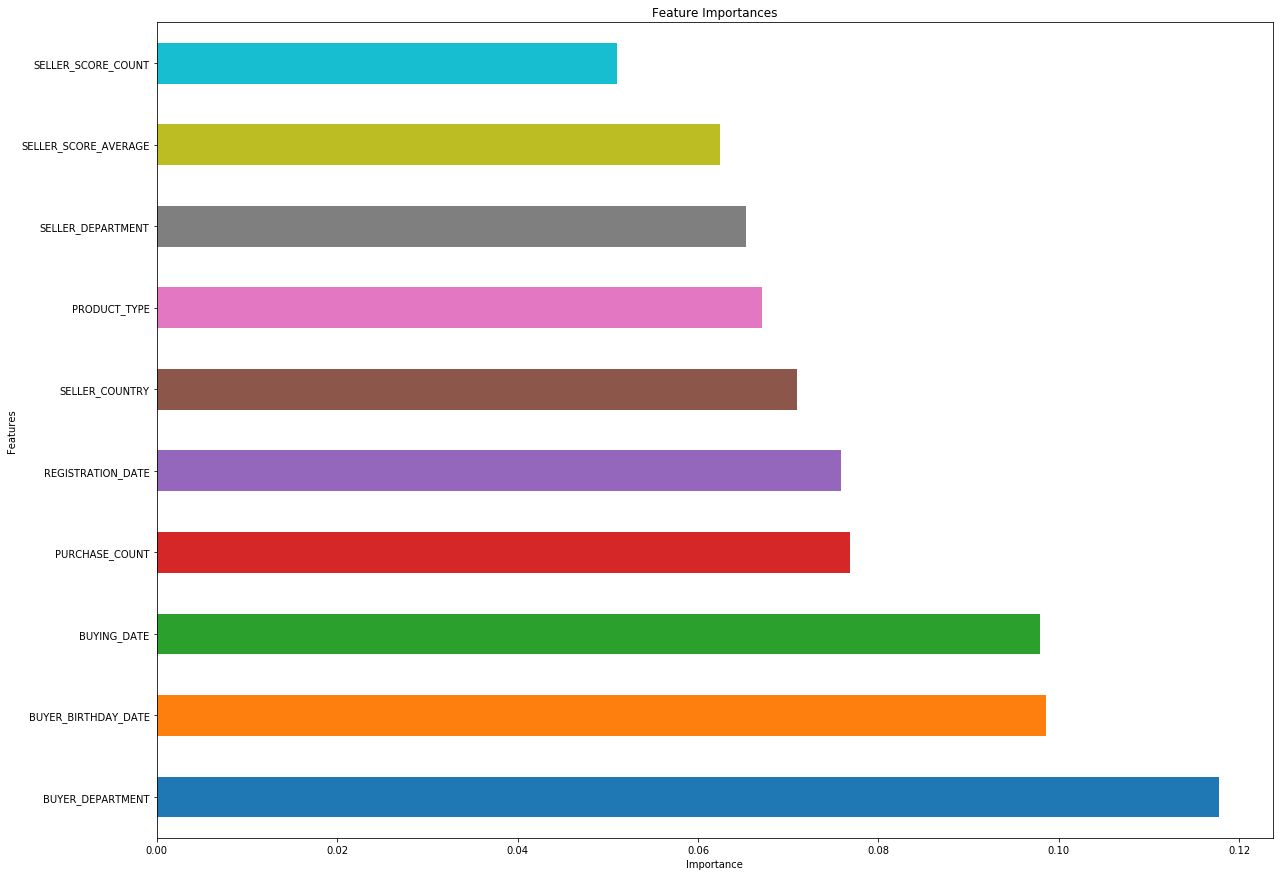

In [308]:
clf = RandomForestClassifier()
clf1 = BestEstimator(grid = False, hard_grid = True)

clf1.Feature_Importances_Tree(clf, Multi_Train[0:100], Multi_Target[0:100], ID = 'ID', value = 0, nb_features = 10)

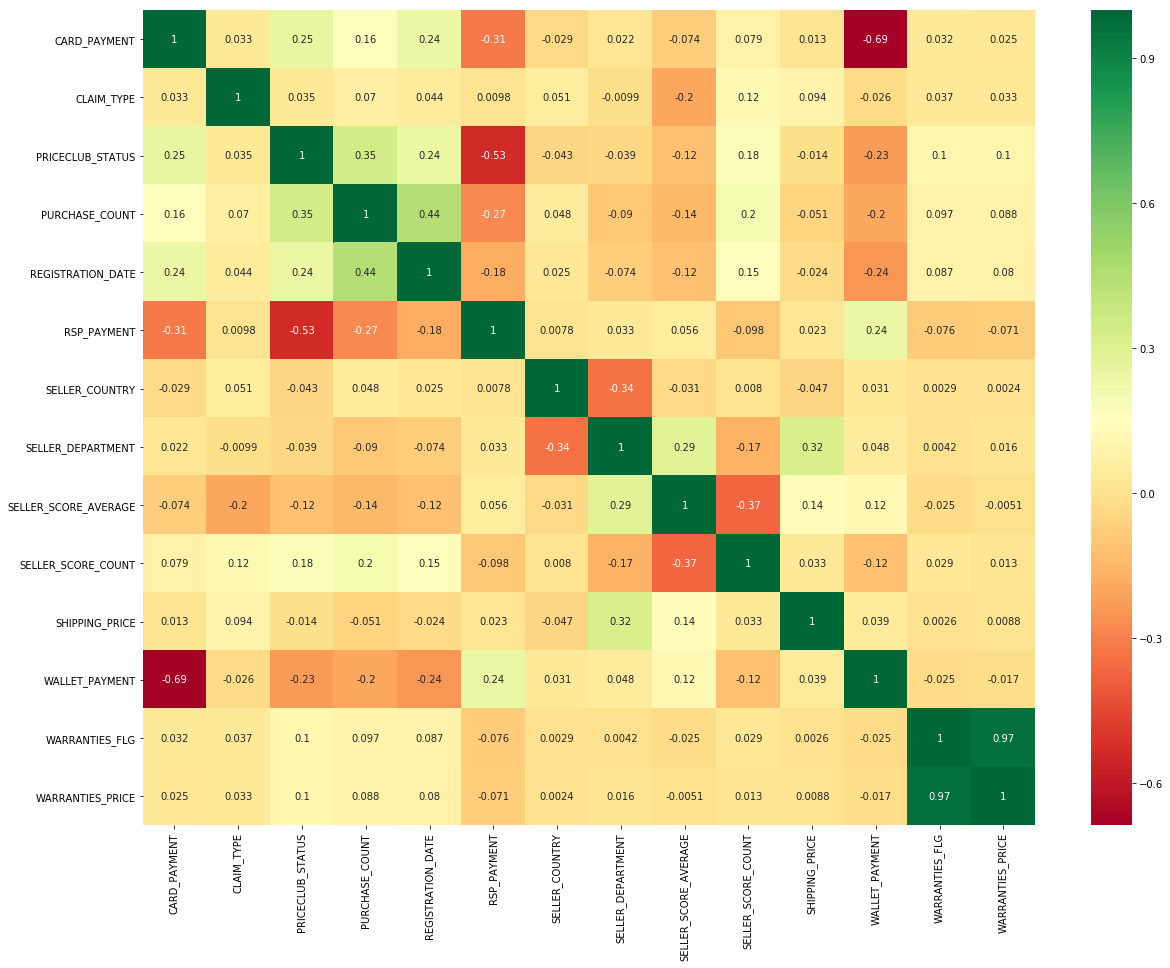

In [309]:
clf1.corr_mat(Multi_Train, Multi_Target, ID = 'ID', n = 1000, n_pairs = 8)

In [332]:
clf1.Feature_Importances_Test(Bin_Train, Bin_Target, n=100, test_used = [f_classif])

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Features,f_classif
8,1_diffSumExports(kmt),9.185460
60,6_diffSumProduction(kmt),8.315503
111,11_diffSumRefinery intake(kmt),7.447389
32,4_diffClosing stocks(kmt),7.181415
10,1_diffSumProduction(kmt),7.105566
79,8_diffSumImports(kmt),7.064626
27,3_diffSumClosing stocks(kmt),6.512051
120,12_diffSumProduction(kmt),6.112458
59,6_diffSumImports(kmt),5.158548
69,7_diffSumImports(kmt),4.852219
